### Computations for the paper 

## "Explicit bounds on the coefficients of modular polynomials and the size of $X_0(N)$"

<a href="https://arxiv.org/abs/2310.14428" target="_blank">Math>arXiv:2310.14428</a>

<hr>



We start by defining our functions in terms of their $q$-series. We must take care to use the same normalizations as in the article. Specifically, 

$$\Delta(\tau) = q\prod_{n=1}^{\infty}(1-q^n)^{24} = q -24q^2 + 252q^3 + \cdots$$

and

$$(2\pi)^{12}\Delta(\rho)=g_2(\rho)^3-27g_3(\rho)^2,$$

so

$$j(\tau) = \frac{g_2(\tau)^3}{(2\pi)^{12}\Delta(\tau)}.$$

This is $\Delta(\tau)$:

In [14]:
# We borrow some of DAvid Lowry-Duda's code 
# (https://math.stackexchange.com/questions/4302146/plotting-graphs-of-modular-forms):

Htoq = lambda x: exp(2 * CDF.pi() * CDF.0 * x)  # maps \tau to $q = e^{2\pi pi \tau}$
C.<q> = CC[]   # the polynomial ring $\mathbb{C}[q]$

M12 = ModularForms(1, 12)  
delta = M12.basis()[0]  # This is Delta
dcoeffs = delta.coefficients(list(range(200)))  # take 100 coefficients
deltapoly = C(dcoeffs)  # interpret coeffs in the polynomial ring C.<q>

deltapoly

7.28391402200000e11*q^199 + 1.45811787638400e12*q^198 - 2.87609150435400e12*q^197 + 2.49793278470400e12*q^196 - 7.03199584080000e11*q^195 - 1.80032564510400e12*q^194 + 5.44238768544200e12*q^193 + 6.80222785536000e11*q^192 + 2.76240335059200e12*q^191 - 1.23587180640000e12*q^190 + 1.22698491552000e12*q^189 - 3.95577698611200e12*q^188 - 3.69199518760800e12*q^187 + 3.19595480064000e11*q^186 - 8.80090306620000e11*q^185 + 1.57498361856000e12*q^184 + 1.75303262282400e12*q^183 - 2.32167481728000e11*q^182 - 9.96774496018000e11*q^181 + 8.07974455680000e11*q^180 + 1.68138422478000e12*q^179 + 5.99830010640000e11*q^178 - 1.30767934248000e12*q^177 + 5.27734751232000e11*q^176 + 4.26959023400000e11*q^175 - 7.76603298240000e11*q^174 - 9.50387449578000e11*q^173 + 2.52090421760000e10*q^172 - 1.21159575306000e12*q^171 + 8.00535869280000e11*q^170 - 1.45837919739300e12*q^169 - 3.56462346240000e11*q^168 + 2.75483389221600e12*q^167 + 7.04042392032000e11*q^166 + 6.50708341920000e11*q^165 - 4.53553290624000e11*

Here is $g_2(\tau)$. Note that our normalization requires $g_2(\tau) = (2\pi)^4G_2(\tau)$, where $G_2(\tau)$ is the built-in series:

In [ ]:
M4 = ModularForms(1, 4)  
g2 = M4.basis()[0]  # This is g_2
coeffs = g2.coefficients(list(range(100)))  # take 100 coefficients
G2poly = C(coeffs)  # interpret coeffs in the polynomial ring C.<q>, normalize

g2poly = (2 * CDF.pi())^4 * G2poly
g2poly

First sanity check: We should have
$$j(i) = \frac{g_2(i)^3}{(2\pi)^{12}\Delta(i)} = \frac{G_2(i)^3}{\Delta(i)} = 1728.$$

In [40]:
# using g_2, needs (2\pi)^12 factor

g2poly(Htoq(CDF.0))^3/((2*CDF.pi())^12*deltapoly(Htoq(CDF.0)))

1728.00000000000

In [39]:
# using G_2:

G2poly(Htoq(CDF.0))^3/(deltapoly(Htoq(CDF.0)))

1728.00000000000

Second sanity check: Lemma 2.1 says
* $\displaystyle\Delta(\rho)=-\frac{3^3}{(2\pi)^{24}}\Gamma\left(\frac{1}{3}\right)^{36},\quad$ where $\rho = e^{\frac{i\pi}{3}}$ and $\Gamma$ stands for Euler's Gamma function, and
* $\displaystyle \Delta(i)=\frac{1}{2^{24}\pi^{18}}\Gamma\left(\frac{1}{4}\right)^{24}.$

In [27]:
rho = exp(2*CDF.pi()*CDF.0/3)
deltapoly(Htoq(rho))

-0.00480513837705295 - 7.70778751650959e-18*I

In [21]:
numerical_approx(-3^3/(2*CDF.pi())^24 * gamma(1/3)^36)

-0.00480513837705297

In [25]:
deltapoly(Htoq(CDF.0))

0.00178536985064215

In [23]:
numerical_approx(1/(2^24*CDF.pi()^18) * gamma(1/4)^24)

0.00178536985064215

Third sanity check: In Lemma 2.3, we claim that
$$f(i) = 3\log|g_2(i)|-12\log(2\pi) = 3\log|G_2(i)| = 
\log\left(\frac{3^3}{2^{18}\pi^{18}}\Gamma\left(\frac{1}{4}\right)^{24}\right) < 1.1266$$

In [29]:
3*log(abs(g2poly(Htoq(CDF.0)))) - 12*log(2*CDF.pi())

1.1265902633899678

In [41]:
3*log(abs(G2poly(Htoq(CDF.0))))

1.12659026338997

In [31]:
numerical_approx(log(3^3/(2^18*CDF.pi()^18) * gamma(1/4)^24))

1.12659026338997

In **Lemma 2.3** we compute upper and lower bounds on the function
\begin{align*}
f(\tau) & = \log\max(|\Delta(\tau)|, |j(\tau)\Delta(\tau)|)\\
& = 
\log\max(|\Delta(\tau)|, |g_2(\tau)^3(2\pi)^{-12}|) \\
& = \left\{ 
    \begin{array}{ll} \log|\Delta(\tau)| & \text{if $|j(\tau)\vert < 1$} \\
    3\log|g_2(\tau)| - 12\log(2\pi) & \text{if $|j(\tau)| \geq 1$.}
    \end{array}\right. \\
& = \left\{ 
    \begin{array}{ll} \log|\Delta(\tau)| & \text{if $|j(\tau)\vert < 1$} \\
    3\log|G_2(\tau)|  & \text{if $|j(\tau)| \geq 1$.}
    \end{array}\right.
\end{align*}

on the fundamental domain $\mathcal{F}$.

The Maximum Modulus Principle tells us to look on the boundary (and at the cusp). This boundary includes the locus of $|j(\tau)|=1$ inside $\mathcal{F}$. This consists of small, nearly circular arcs close to the two corners (6th roots of unity) of $\mathcal{F}$. 

In [43]:
f = lambda z: log(max(abs(deltapoly(Htoq(z))), abs(G2poly(Htoq(z)))^3))

f(i)

1.12659026338997

Here we plot $f(\tau)$ for $\tau\in\mathcal{F}$. It is clear from the plot that $f$ attains its maximum at $i$ and its minimum near the corners. 

Most of this surface is $z = \log|G_2(\tau)|$, but this goes to $-\infty$ at the sixth roots of unity $\rho, \rho^2$, where $G_2$ (and $j$) vanishes. These spikes are cut off and replaced by $\log|\Delta(\tau)|$, which is close to constant in this region.

Note that we're actually plotting $0.2f(\tau)$, so it's easier to see what's going on.

In [ ]:
from numpy import arange

x, y = var('x y')

# We define f(z) = 0 for z outside the fundamental domain, making it easier to plot

fF = lambda z: 0.0 if (abs(z) < 1.0) or abs(real_part(z)) > 0.5 else f(z)

fF_plot = list_plot3d([(x, y, 0.2*fF(x + I*y)) for x in arange(-0.55,0.55,0.01) for y in arange(0.8, 2.0, 0.005)], 
                 interpolation_type='linear')


fF_plot.show()

Let's zoom into those corners to see where exactly the minimum occurs. Is it at $\tau = \rho$?

In [ ]:
pointset = [(x, y, 0.2*fF(x + I*y)) for x in arange(0.45,0.51,0.001) for y in arange(0.85, 0.95, 0.001)]

fF_corner = list_plot3d(pointset, interpolation_type='linear')

fF_corner.show()

No. The lowest point occurs on the vertical line $\mathrm{Re}(\tau)=\frac{1}{2}$ where $j(\tau) = 1$ (note that $j$ is real on this line).

We can read off an approximation of the lowest value:

In [75]:
B = 0.0
for (x,y,z) in pointset:
    if z < B:
        B = z
        
B

-5.53043062035446

We need to compute this minimum to better accuracy. We solve for $j(0.5 + iy) = 1$ for $y\in[\frac{\sqrt{3}}{2}, 1]$:

In [87]:
y_min = find_root(lambda y: abs(elliptic_j(0.5 + I*y))-1.0, 0.86, 1.0)
y_min

0.8944431353666745

In [88]:
f(0.5 + I*y_min)

-5.53342789843114

In [89]:
3*log(abs(G2poly(Htoq(0.5 + I*y_min))))

-5.53342789843114

In [90]:
log(abs(deltapoly(Htoq(0.5 + I*y_min))))

-5.53342789843171

So $f(\tau) > -5.5335$ seems correct.

<hr>

Now we plot $f(\tau)$ on the boundary of $\mathcal{F}$, as well as on the contours $\partial D$ and $\partial D'$ where $|j(\tau)|=1$ inside $\mathcal{F}$. This recreates the plots in the paper, and again shows that we have indeed found the global minimum of $f(\tau)$.

The boundary of $\mathcal{F}$ consists of:

* $C$ : the circular arc from $\rho$ to $\rho^2$ of radius 1;
* $L$ : the halfline $\mathrm{Re}{\tau} = \frac{1}{2}$ and $\mathrm{Im}(\tau) \geq \frac{\sqrt{3}}{2}$;
* $L'$ : the halfline $\mathrm{Re}{\tau} = -\frac{1}{2}$ and $\mathrm{Im}(\tau) \geq \frac{\sqrt{3}}{2}$;

We also two contours where $|j(\tau)|=1$ inside $\mathcal{F}$:
* $\partial D$ : near $\rho$;
* $\partial D'$ : near $\rho^2$;

We first construct the contour $\partial D$. For this we first define a function to compute the $y$-value where $|j(x+iy)|=1$ for given $x$.

In [134]:
def jisone(x, ymin=0.8, ymax=0.9, target=1.0):
    '''Returns y value for which |j(x+I*y)| == 1 and x^2 + y^2 >= 1'''
    x = float(x)
    if x^2 + ymin^2 < 1.0:
        ymin = numerical_approx(sqrt(1-x^2))
    try: 
        y = find_root(lambda y: abs(elliptic_j(x + I*y))-target, 0.7, 0.9)
#         y = find_root(lambda y: abs(elliptic_j(x + I*y))-1.0, 0.86, 1.0)
    except:
        return ymin, 100
    return y, abs(elliptic_j(x + I*y))

jisone(0.5)

(0.8944431353668976, 1.00000000002374)

In [147]:
dD = []

for x in arange(0.45, 0.5, 0.0001):
    (y, j) = jisone(x)
    if j < 100 and x^2 + y^2 >= 1.0:
        dD.append((x,y))
        
# dD

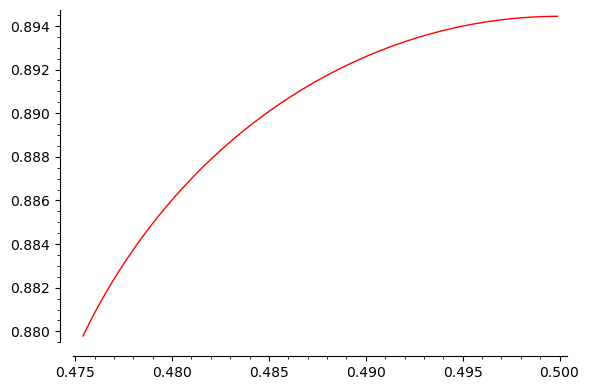

In [148]:
D_plot = list_plot(dD, plotjoined=True, color='red')
D_plot.show()

Now we can plot all of our boundaries:

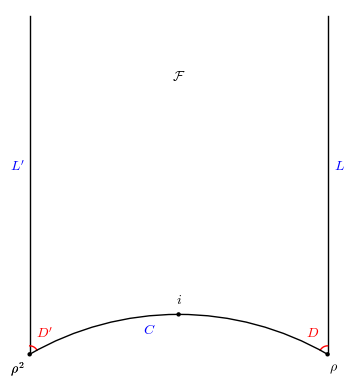

In [151]:
pic = arc((0,0), 1, sector=(pi/3,2*pi/3), color='black')\
+line([(-0.5, 0.866), (-0.5,2)], color='black')\
+line([(0.5, 0.866), (0.5,2)], color='black')\
+list_plot(dD, plotjoined=True, color='red')\
+list_plot([(-x, y) for (x,y) in dD], plotjoined=True, color='red')\
+circle((-0.5, 0.866), 0.005, fill=True, color='black')\
+circle((0.5, 0.866), 0.005, fill=True, color='black')\
+circle((0, 1), 0.005, fill=True, color='black')\
+text('$i$', (0, 1.05), color='black')\
+text('$\\rho$', (0.52, 0.82), color='black')\
+text('$\\rho^2$', (-0.54, 0.82), color='black')\
+text('$\\rho^2$', (-0.54, 0.82), color='black')\
+text("$L'$", (-0.54, 1.5), color='blue')\
+text('$L$', (0.54, 1.5), color='blue')\
+text('$C$', (-0.1, 0.95), color='blue')\
+text("$D'$", (-0.45, 0.94), color='red')\
+text("$D$", (0.45, 0.94), color='red')\
+text("$\\mathcal{F}$", (0, 1.8), color='black')\

show(pic, axes=False)

Finally, we can plot $f(\tau)$ on these boundaries. Due to symmetry, we will only plot $\mathrm{Re}(\tau) \geq 0$. 

We combine several plots:
* $f(\tau)$ for $\tau$ on the arc $C$. Here $x=\mathrm{re}(\tau)$ and $y = f(\tau)$;
* $f(\tau)$ for $\tau$ on the line $L$. Here $x=t \in[\frac{\sqrt{3}}{2}, \frac{3\sqrt{3}}{2}]$ and $y=f(0.5 + it)$;
* $f(\tau)$ for $\tau$ on $\partial D$. Here $x=\mathrm{re}(\tau)$ and $y = f(\tau)$. This is plotted in red.


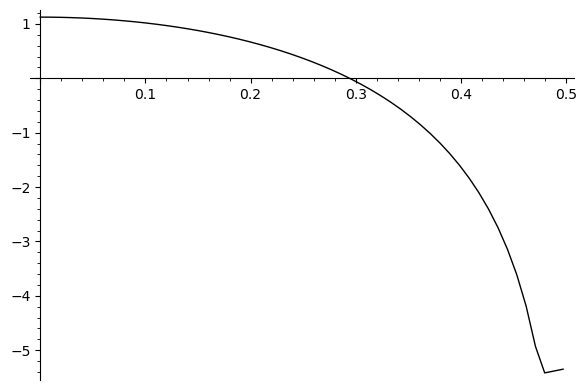

In [156]:
fC_plot = list_plot([(sin(t), f(sin(t) + I*cos(t))) for t in arange(0, pi/6, 0.01)], plotjoined=True, color='black')
fC_plot

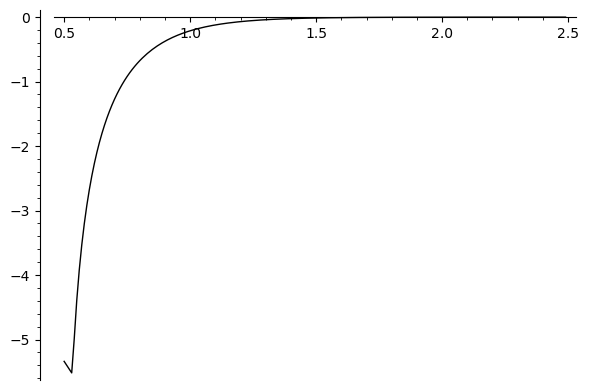

In [166]:
fL_plot = list_plot([(t-0.5, f(0.5 + I*sqrt(3)*t/2)) for t in arange(1, 3, 0.01)], plotjoined=True, color='black')
fL_plot

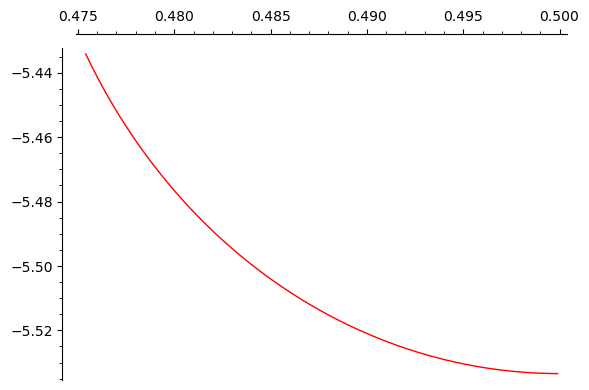

In [164]:
fD_plot = list_plot([(x, f(x + I*y)) for (x,y) in dD], plotjoined=True, color='red')
fD_plot

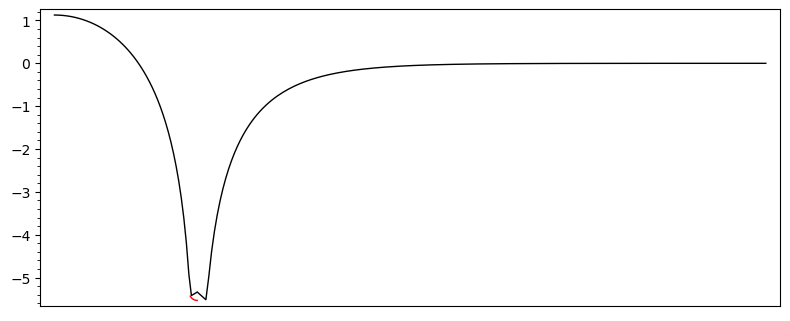

In [175]:
show(fD_plot+fL_plot+fC_plot, axes=False, frame=True, ticks=[[],1.0], figsize=8, aspect_ratio=0.15)


This confirms again that the lowest point on this plot occurs when $j(\tau) = 1$ and $\mathrm{Re}(\tau) = \frac{1}{2}$.

Finally, let's draw it one more time as nicely as possible. We multiply $x$-coords by 6 so we can use `aspect_ratio=1` to draw round points.

In [184]:
fig1_plots = list_plot([(6*sin(t), f(sin(t) + I*cos(t))) for t in arange(0, pi/6, 0.01)], plotjoined=True, color='black')+\
list_plot([(6*(t-0.5), f(0.5 + I*sqrt(3)*t/2)) for t in arange(1, 3, 0.01)], plotjoined=True, color='black')+\
list_plot([(6*x, f(x + I*y)) for (x,y) in dD], plotjoined=True, color='red')

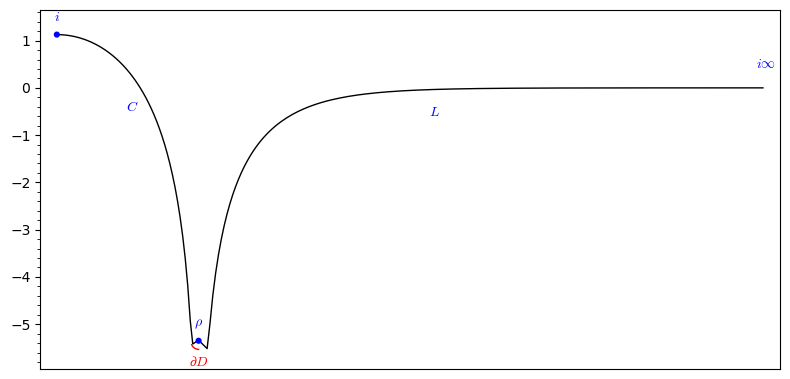

In [189]:
fig1 = fig1_plots\
+circle((0,1.127), 0.05, fill=True, color='blue')\
+text('$i$', (0,1.5), color='blue')\
+circle((3, -5.35), 0.05, fill=True, color='blue')\
+text('$\\rho$', (3, -5), color='blue')\
+text('$i\\infty$',(15, 0.5), color='blue')\
+text('$C$', (1.6,-0.4), color='blue')\
+text('$L$', (8, -0.5), color='blue')\
+text('$\\partial D$', (3,-5.8), color='red')
fig1.show(axes=False, frame=True, ticks=[[],1.0], figsize=8, aspect_ratio=1)

<hr>

On p.13, we bound $-\log|\Delta(\tau)(\mathrm{Im}\tau)^6|$ for $\tau = iy$ with $j(\tau)\in[1728,3456]$.

First, we check that this means $1 \leq y < 1.2536$.

In [190]:
elliptic_j(I*1), elliptic_j(I*1.2536)

(1728.00000000000, 3456.76668132859)

Now we plot $x \mapsto -\log|\Delta(ix)x^6|$:

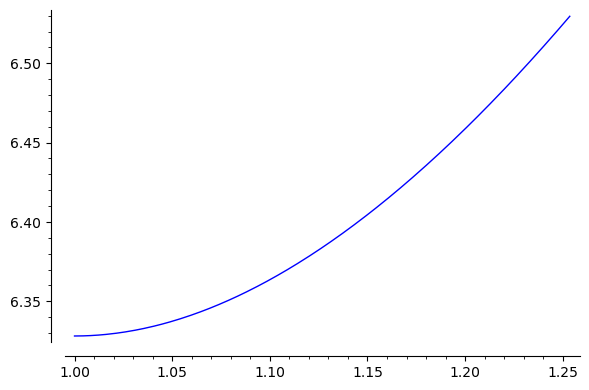

In [200]:
g = lambda x: -log(abs(deltapoly(Htoq(I*x)))*x^6)

plot(g, (x, 1.0, 1.2536))

This function is increasing and the maximal value is clearly at the right endpoint. There we have

In [201]:
g(1.2536)

6.52959831544935

We conclude that indeed,
$$- \log\big[|\Delta(\tau)|(\mathrm{Im}\tau)^6\big] \leq 6.5296$$
for $\tau=iy$ and $j(\tau)\in[1728, 3456]$.